Saving 3. Predict Disease Outcome Based on Genetic and Clinical Data.csv to 3. Predict Disease Outcome Based on Genetic and Clinical Data (2).csv
Accuracy: 0.9649122807017544
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



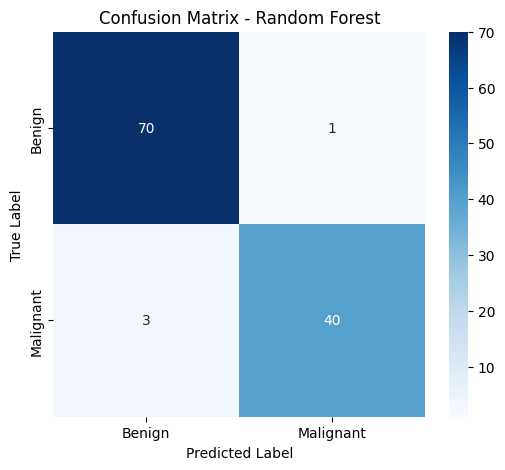

In [7]:
# STEP 1: Upload file
from google.colab import files
uploaded = files.upload()

# STEP 2: Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# STEP 3: Load the uploaded CSV
df = pd.read_csv("3. Predict Disease Outcome Based on Genetic and Clinical Data (1).csv")

# STEP 4: Data Cleaning
df.drop(columns=["id", "Unnamed: 32"], inplace=True)
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})

# STEP 5: Feature selection and splitting
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 6: Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# STEP 7: Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# STEP 8: Evaluate
y_pred = model.predict(X_test_scaled)

# Text-based output
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# STEP 9: Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest")
plt.show()
